In [17]:
import os
import requests

In [18]:
DATA_DIR = "data"
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)
URLS = {
    'KDDTrain+.txt':'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt',
    'KDDTest+.txt' : 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt'
}

def download_file(url,filename):
    local_path = os.path.join(DATA_DIR, filename)

    if os.path.exists(local_path):
        print(f"Correct file found: {filename} already exists")
        return
    print(f"Downloading {filename}...")
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        with open(local_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size = 8000):
                f.write(chunk)
        print(f"Success saved to {local_path}")
    except Exception as e:
        print(f"Failed to download {filename} :{e}")
        
                    

In [19]:
for filename, url in URLS.items():
    download_file(url,filename)
print("\nAll files should now be in 'data' folder.")

Correct file found: KDDTrain+.txt already exists
Correct file found: KDDTest+.txt already exists

All files should now be in 'data' folder.


In [20]:
import pandas as pd
import os

# Define the path to your data
DATA_DIR = 'data'
TRAIN_PATH = os.path.join(DATA_DIR, 'KDDTrain+.txt')

# Define the standard column names for the NSL-KDD dataset
COLUMNS = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", 
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "class", "difficulty_level"
]

# Read the dataset
# header=None tells pandas there is no header row in the file
# names=COLUMNS assign the column names we defined above
df = pd.read_csv(TRAIN_PATH, header=None, names=COLUMNS)

df.to_csv("labeled_CSV",index=False)
# print(


# Display the first few rows
# df
# df.head()

In [21]:
train_path = os.path.join(DATA_DIR, 'KDDTrain+.txt')
test_path = os.path.join(DATA_DIR, 'KDDTest+.txt')

# Read CSV with our column names
train_df = pd.read_csv(train_path, names=COLUMNS)
test_df = pd.read_csv(test_path, names=COLUMNS)

print("Data Loaded Successfully!")

Data Loaded Successfully!


In [22]:
# Display first 5 rows
train_df.head()
train_df.tail()

test_df.tail()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14


In [23]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [24]:
print("\n---Data Info---")
train_df.info()


---Data Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-n

In [25]:
print(f"Missing Values in teh Training Data: {train_df.isnull().sum().sum()}")
print(f"Missing Values in teh Testing Data: {test_df.isnull().sum()}")

Missing Values in teh Training Data: 0
Missing Values in teh Testing Data: duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
s

In [26]:
print(f"Duplicate data in the training dataset {train_df.duplicated().sum()}")
print(f"Duplicate data in the test dataset {test_df.duplicated()}")

Duplicate data in the training dataset 0
Duplicate data in the test dataset 0        False
1        False
2        False
3        False
4        False
         ...  
22539    False
22540    False
22541    False
22542    False
22543    False
Length: 22544, dtype: bool


In [27]:
train_df['class']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: class, Length: 125973, dtype: object

In [28]:


import matplotlib.pyplot as plt
import seaborn as sns
unique_labels = train_df['class'].unique()
print(f" There are {len(unique_labels)} unique lables including 'normal'.")
print(unique_labels)

 There are 23 unique lables including 'normal'.
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [29]:
train_df['class'].value_counts()

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [30]:
import pandas as pd
df = pd.read_csv(TRAIN_PATH, header=None, names=COLUMNS)

# Display the first few rows
df
df.duplicated().sum()

0

In [31]:
df['protocol_type'].unique()
df['protocol_type']

0         tcp
1         udp
2         tcp
3         tcp
4         tcp
         ... 
125968    tcp
125969    udp
125970    tcp
125971    tcp
125972    tcp
Name: protocol_type, Length: 125973, dtype: object

In [32]:
tab = pd.read_csv(train_path,names = COLUMNS)
# df.head()
df.shape
# tab

df['protocol_type']
df[(df['protocol_type'] == 'tcp') & (df['src_bytes']>500)]
# x.unique().sum()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
42,2,tcp,smtp,SF,1591,372,0,0,0,0,...,0.81,0.02,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
60,0,tcp,ftp_data,SF,641,0,0,0,0,0,...,0.25,0.02,0.25,0.04,0.00,0.00,0.00,0.00,normal,21
65,0,tcp,smtp,SF,696,333,0,0,0,0,...,0.39,0.04,0.01,0.02,0.00,0.00,0.00,0.00,normal,21
95,2,tcp,smtp,SF,3065,331,0,0,0,0,...,0.48,0.02,0.00,0.02,0.01,0.02,0.00,0.00,normal,21
111,0,tcp,smtp,SF,2089,335,0,0,0,0,...,0.60,0.03,0.00,0.00,0.01,0.02,0.00,0.01,normal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125944,1,tcp,smtp,SF,2049,362,0,0,0,0,...,0.92,0.02,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125952,0,tcp,smtp,SF,1289,408,0,0,0,0,...,0.23,0.06,0.00,0.00,0.51,0.00,0.02,0.00,normal,15
125957,1,tcp,smtp,SF,1247,327,0,0,0,0,...,0.53,0.03,0.00,0.02,0.01,0.02,0.00,0.00,normal,21
125965,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,normal,19


In [37]:
subset = df[['duration','protocol_type','class']]
subset.head()

df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [38]:
tcp_traffic = df[df['protocol_type'] == 'tcp']
print(f"Traffic of the TCP Count is: {len(tcp_traffic)}")

Traffic of the TCP Count is: 102689


In [42]:
tcp_traffic = df[df['protocol_type'] == 'udp']
print(f"Traffic of the UDP Count is: {len(tcp_traffic)}")

Traffic of the UDP Count is: 14993


In [41]:
tcp_traffic = df[df['protocol_type'] == 'icmp']
print(f"Traffic of the ICMP Count is: {len(tcp_traffic)}")

Traffic of the ICMP Count is: 8291


In [45]:
df['land'].unique()

array([0, 1], dtype=int64)

In [47]:
land_attack = df[df['land']==1]
print(f"Land attacks Found are: {len(land_attack)}")

Land attacks Found are: 25


In [50]:
first_ten_rows = df.iloc[0:30]
first_ten_rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [52]:
df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [54]:
print(df['class'].value_counts())

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [56]:
print("\nAverage Duration by the Protocols")
print(df.groupby('protocol_type')['duration'].mean())


Average Duration by the Protocols
protocol_type
icmp      0.000000
tcp     281.386419
udp     485.372040
Name: duration, dtype: float64


In [60]:
print("\nStatistics by protocol (Duration): ")
print(df.groupby('protocol_type')['duration'].agg(['min','max','count','mean']))


Statistics by protocol (Duration): 
               min    max   count        mean
protocol_type                                
icmp             0      0    8291    0.000000
tcp              0  42908  102689  281.386419
udp              0  29505   14993  485.372040


In [65]:
protocol_counts = df['protocol_type'].value_counts()
protocol_counts

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

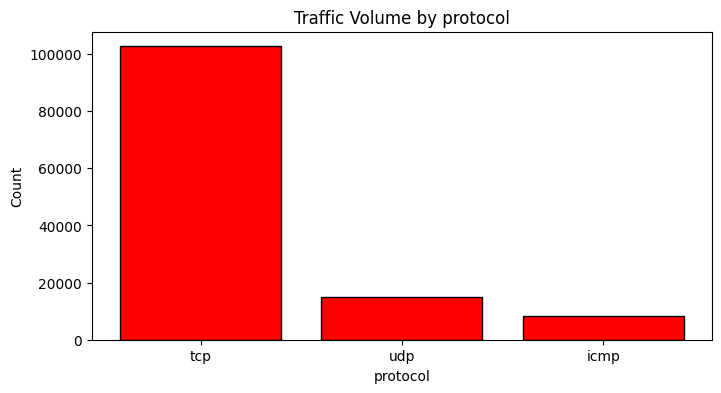

In [64]:
import matplotlib.pyplot as plt

protocol_counts = df['protocol_type'].value_counts()
protocol_counts

def set_plot(title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
plt.figure(figsize=(8,4))
plt.bar(protocol_counts.index,protocol_counts.values,color = "red",edgecolor = "black")
set_plot("Traffic Volume by protocol","protocol","Count")
plt.show()